# Pre-treatment

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from typing import Tuple, Generator
import numpy as np
from skimage import io, util
from skimage.feature import hog

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# concatenate all csv files into one
with open('data/labels.csv', 'w') as outfile:
    for file in os.listdir('data/labels_csv'):
        with open('data/labels_csv/' + file) as infile:
            # add filename to each line
            for line in infile:
                outfile.write(file[:-4] + ',' + line)

In [22]:
def get_ecocup_info(difficult: bool) -> Generator[Tuple[str, int, int, int, int], None, None]:
    with open("data/labels.csv") as file:
        line = file.readline()
        while line:
            img_name, x, y, w, h, diff = map(str.strip, line.split(','))
            if not difficult and diff == '1':
                # skip difficult images
                pass
            elif int(w) / int(h) < 1.5 or int(w) / int(h) > 2:
                # skip images with wrong aspect ratio
                pass
            else:
                yield img_name, x, y, w, h
            line = file.readline()


# returns a cv2 image
def ecocup_image(image_file: str, x: int, y: int, w: int, h: int) -> np.ndarray:
    return io.imread('data/images/pos/' + image_file + '.jpg')[int(x):int(x) + int(w), int(y):int(y) + int(h)]


def get_pos_images(difficult=False) -> Generator[np.ndarray, None, None]:
    # generate positive images (ecocups)
    for info in get_ecocup_info(difficult):
        yield info, resize_image(ecocup_image(*info), (100, 200))


def resize_image(source: np.ndarray, size: Tuple[int, int]) -> np.ndarray:
    return cv2.resize(source, size)


def hog_image(image: np.ndarray) -> np.ndarray:
    # image to greyscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return hog(image, visualize=True)

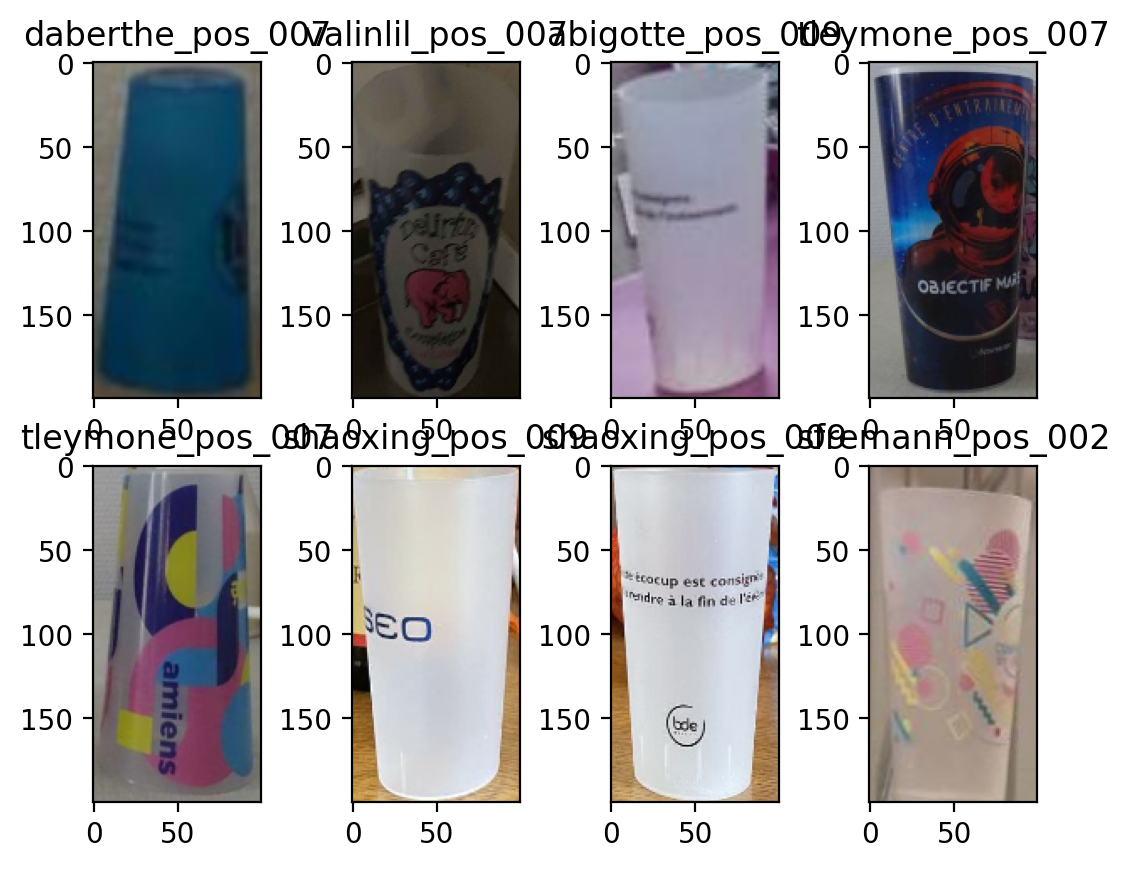

In [23]:
# show 8 images
fig, axs = plt.subplots(2, 4)
gen = get_pos_images()
for i, ax in enumerate(axs.flat):
    info, img = next(gen)
    ax.imshow(img, cmap='gray')
    ax.set_title(info[0])

In [21]:
# count training images
len(list(get_pos_images()))

439